In [2]:
from pgmpy.models import BayesianNetwork;
from pgmpy.factors.discrete.CPD import TabularCPD;
from pgmpy.inference import VariableElimination;
import matplotlib.pyplot as plt;
import networkx as nx;

alarm = 'Alarm';
burglary = 'Burglary';
earthquake = 'Earthquake';
neighbour_call = 'Neighbour Call';

c:\Users\vadal\pyver\py3121\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
graph = BayesianNetwork([(burglary, alarm), (earthquake, alarm), (alarm, neighbour_call)]);

print(graph.nodes());
print(neighbour_call in graph);

['Burglary', 'Alarm', 'Earthquake', 'Neighbour Call']
True


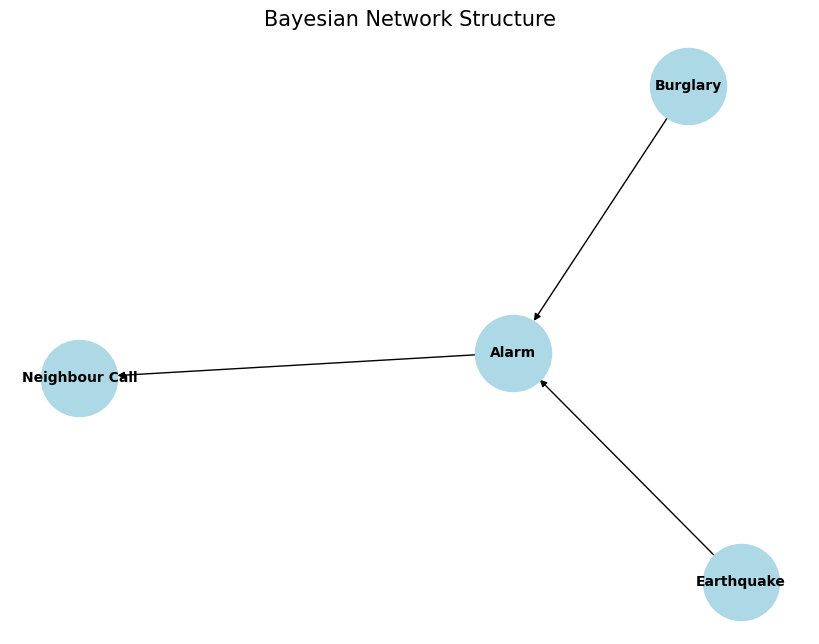

In [4]:
# Plotting the Bayesian Network graph
def plot_bayesian_network(graph):
    plt.figure(figsize=(8, 6))
    G = nx.DiGraph(graph.edges())
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_size=3000, node_color='lightblue', font_size=10, font_weight='bold')
    plt.title('Bayesian Network Structure', size=15)
    plt.show()
    # plt.savefig('graph', format='png')

# Visualize Bayesian Network Structure
plot_bayesian_network(graph)

In [5]:
b_cpd = TabularCPD(burglary, 2, [[0.005], [0.995]], state_names={burglary: ['True', 'False']});
print(b_cpd);

+-----------------+-------+
| Burglary(True)  | 0.005 |
+-----------------+-------+
| Burglary(False) | 0.995 |
+-----------------+-------+


In [6]:
e_cpd = TabularCPD(earthquake, 2, [[0.002], [0.998]], state_names={earthquake: ['True', 'False']});
print(e_cpd);

+-------------------+-------+
| Earthquake(True)  | 0.002 |
+-------------------+-------+
| Earthquake(False) | 0.998 |
+-------------------+-------+


In [7]:
a_cpd = TabularCPD(alarm, 2, [[0.99, 0.97, 0.27, 0.001], [0.01, 0.03, 0.73, .999]], evidence=[burglary, earthquake], evidence_card=[2, 2], state_names={alarm: ['True', 'False'], burglary: ['True', 'False'], earthquake: ['True', 'False']});
print(a_cpd);

+--------------+------------------+-----+-------------------+
| Burglary     | Burglary(True)   | ... | Burglary(False)   |
+--------------+------------------+-----+-------------------+
| Earthquake   | Earthquake(True) | ... | Earthquake(False) |
+--------------+------------------+-----+-------------------+
| Alarm(True)  | 0.99             | ... | 0.001             |
+--------------+------------------+-----+-------------------+
| Alarm(False) | 0.01             | ... | 0.999             |
+--------------+------------------+-----+-------------------+


In [8]:
n_cpd = TabularCPD(neighbour_call, 2, [[0.98, 0.005], [0.02, 0.995]], evidence=[alarm], evidence_card=[2], state_names={neighbour_call: ['True', 'False'], alarm: ['True', 'False']});
print(n_cpd);

+-----------------------+-------------+--------------+
| Alarm                 | Alarm(True) | Alarm(False) |
+-----------------------+-------------+--------------+
| Neighbour Call(True)  | 0.98        | 0.005        |
+-----------------------+-------------+--------------+
| Neighbour Call(False) | 0.02        | 0.995        |
+-----------------------+-------------+--------------+


In [9]:
graph.add_cpds(b_cpd, e_cpd, a_cpd, n_cpd);
assert graph.check_model();

In [10]:
# Create inference object
infer = VariableElimination(graph)

# Function to visualize results for decision making
def plot_inference_result(inference_result, title="Inference Result"):
    probs = inference_result.values;
    labels = inference_result.state_names[inference_result.variables[0]];
    colour_mapping = {
        'True': 'lightgreen',
        'False': 'salmon'
    }
    colours = [colour_mapping.get(label) for label in labels]
    plt.figure(figsize=(6, 4))
    plt.bar(labels, probs, color=colours, alpha=1)
    plt.ylabel('Probability')
    plt.title(title)
    plt.show()

P(Alarm | Burglary, ¬Earthquake):
+--------------+--------------+
| Alarm        |   phi(Alarm) |
+==============+==============+
| Alarm(True)  |       0.9700 |
+--------------+--------------+
| Alarm(False) |       0.0300 |
+--------------+--------------+


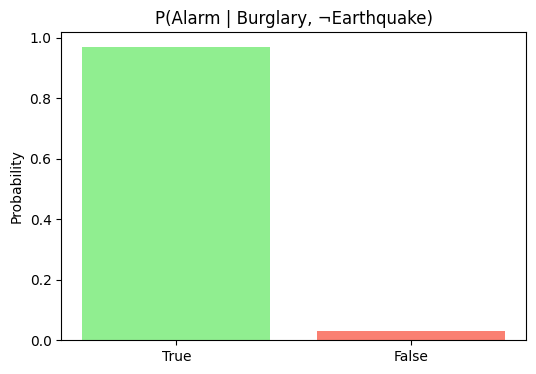

In [11]:
# Query 1: Probability that the alarm is ringing given burglary but no earthquake
prob_alarm = infer.query(variables=[alarm], evidence={burglary: 'True', earthquake: 'False'})
print("P(Alarm | Burglary, ¬Earthquake):")
print(prob_alarm)
plot_inference_result(prob_alarm, title="P(Alarm | Burglary, ¬Earthquake)")

P(Burglary | Alarm, Neighbour Call, Earthquake):
+-----------------+-----------------+
| Burglary        |   phi(Burglary) |
+=================+=================+
| Burglary(True)  |          0.0181 |
+-----------------+-----------------+
| Burglary(False) |          0.9819 |
+-----------------+-----------------+


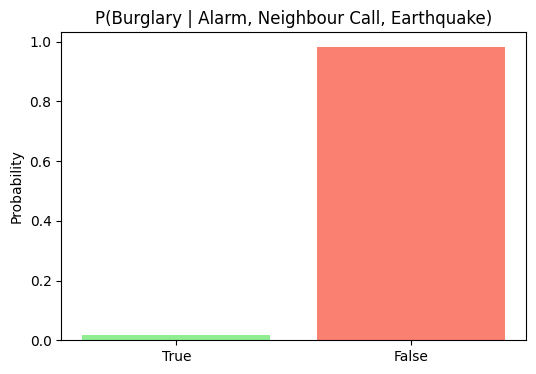

In [12]:
# Query 2: Probability that a burglary has occured given a call from the neighbour due to the alarm and an earthquake
prob_burglar = infer.query(variables=[burglary], evidence={alarm: 'True', neighbour_call: 'True', earthquake: 'True'})
print("P(Burglary | Alarm, Neighbour Call, Earthquake):")
print(prob_burglar)
plot_inference_result(prob_burglar, title="P(Burglary | Alarm, Neighbour Call, Earthquake)")

P(Burglary | Neighbour Call, Earthquake):
+-----------------+-----------------+
| Burglary        |   phi(Burglary) |
+=================+=================+
| Burglary(True)  |          0.0179 |
+-----------------+-----------------+
| Burglary(False) |          0.9821 |
+-----------------+-----------------+


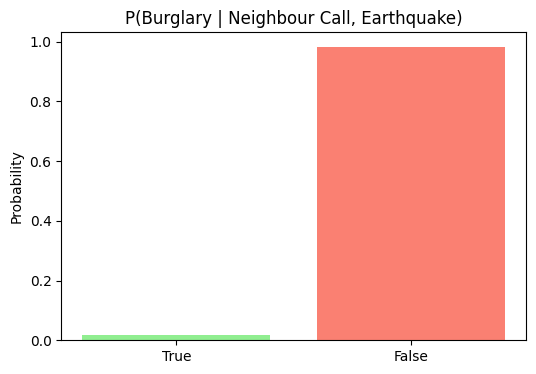

In [13]:
# Query 3: Probability that the a burglary has occured given a call from the neighbour and an earthquake took place
prob_burglar = infer.query(variables=[burglary], evidence={neighbour_call: 'True', earthquake: 'True'})
print("P(Burglary | Neighbour Call, Earthquake):")
print(prob_burglar)
plot_inference_result(prob_burglar, title="P(Burglary | Neighbour Call, Earthquake)")

P(Burglary):
+-----------------+-----------------+
| Burglary        |   phi(Burglary) |
+=================+=================+
| Burglary(True)  |          0.0050 |
+-----------------+-----------------+
| Burglary(False) |          0.9950 |
+-----------------+-----------------+


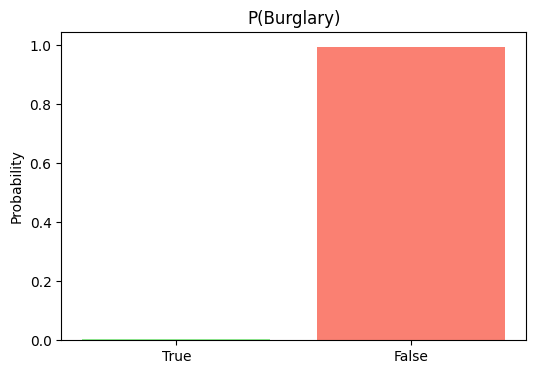

In [14]:
# Query 4: Probability that the a burglary will occur normally
prob_burglar = infer.query(variables=[burglary])
print("P(Burglary):")
print(prob_burglar)
plot_inference_result(prob_burglar, title="P(Burglary)")